In [1]:
!pip uninstall numpy -y
!pip install numpy==1.16.2

Uninstalling numpy-1.17.5:
  Successfully uninstalled numpy-1.17.5
     |████████████████████████████████| 17.3MB 201kB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [1]:
import numpy as np 
print(np.__version__)
from io import StringIO
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import re

1.16.2


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
mixed_dataset = np.load('/content/drive/My Drive/medGAN/count_5digit_mixed/count_5digit_mixed.matrix')
female_dataset = np.load('/content/drive/My Drive/medGAN/count_5digit_female/count_5digit_female.matrix')
male_dataset = np.load('/content/drive/My Drive/medGAN/count_5digit_male/count_5digit_male.matrix')
mixed_generated = np.load('/content/drive/My Drive/medGAN/count_5digit_mixed_full.npy')
female_generated = np.load('/content/drive/My Drive/medGAN/count_5digit_female_full.npy')
male_generated = np.load('/content/drive/My Drive/medGAN/count_5digit_male_full.npy')

In [4]:
# Shape before
print(mixed_dataset.shape)
print(mixed_generated.shape)
print(female_dataset.shape)
print(female_generated.shape)
print(male_dataset.shape)
print(male_generated.shape)

(46520, 6985)
(46000, 6985)
(20399, 5650)
(20000, 5650)
(26121, 5853)
(26000, 5853)


In [0]:
mixed_dataset = mixed_dataset[520:]
female_dataset = female_dataset[399:]
male_dataset = male_dataset[121:]

In [6]:
# Shape after
print(mixed_dataset.shape)
print(mixed_generated.shape)
print(female_dataset.shape)
print(female_generated.shape)
print(male_dataset.shape)
print(male_generated.shape)

(46000, 6985)
(46000, 6985)
(20000, 5650)
(20000, 5650)
(26000, 5853)
(26000, 5853)


In [0]:
mixed_prob_dataset = mixed_dataset.sum(axis=0)
mixed_prob_generated = mixed_generated.sum(axis=0)
dim_prob_mixed = lambda t: t / 46000
vfunc = np.vectorize(dim_prob_mixed)
mixed_prob_dataset = vfunc(mixed_prob_dataset)
mixed_prob_generated = vfunc(mixed_prob_generated)

In [0]:
female_prob_dataset = female_dataset.sum(axis=0)
female_prob_generated = female_generated.sum(axis=0)
dim_prob_female = lambda t: t / 20000
vfunc = np.vectorize(dim_prob_female)
female_prob_dataset = vfunc(female_prob_dataset)
female_prob_generated = vfunc(female_prob_generated)

In [0]:
male_prob_dataset = male_dataset.sum(axis=0)
male_prob_generated = male_generated.sum(axis=0)
dim_prob_male = lambda t: t / 26000
vfunc = np.vectorize(dim_prob_male)
male_prob_dataset = vfunc(male_prob_dataset)
male_prob_generated = vfunc(male_prob_generated)

In [17]:
print(max(mixed_prob_dataset))
print(max(mixed_prob_generated))

0.4453695652173913
0.5609554602581521


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


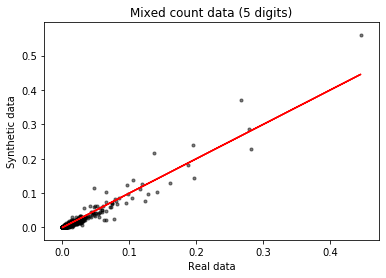

In [22]:
N = 50
x = mixed_prob_dataset
y = mixed_prob_generated
colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Mixed count data (5 digits)')
plt.xlabel('Real data')
plt.ylabel('Synthetic data')
plt.plot(x,x, 'r') # identity line
plt.savefig('/content/drive/My Drive/medGAN/count_5digit_mixed.svg')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


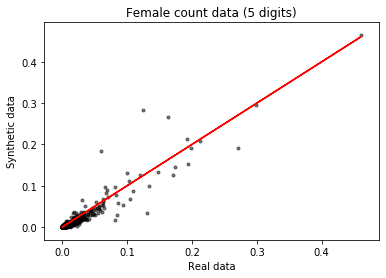

In [23]:
N = 50
x = female_prob_dataset
y = female_prob_generated
colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Female count data (5 digits)')
plt.xlabel('Real data')
plt.ylabel('Synthetic data')
plt.plot(x,x,color='r') # identity line
plt.savefig('/content/drive/My Drive/medGAN/count_5digit_female.svg')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


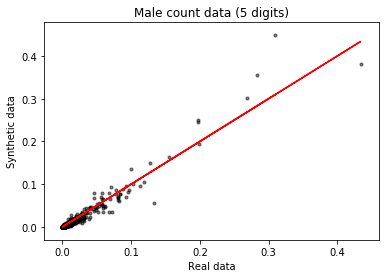

In [24]:
x = male_prob_dataset
y = male_prob_generated
colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Male count data (5 digits)')
plt.xlabel('Real data')
plt.ylabel('Synthetic data')
plt.plot(x,x, color='r') # identity line
plt.savefig('/content/drive/My Drive/medGAN/count_5digit_male.svg')
plt.show()

In [0]:
from sklearn.metrics import f1_score
import scipy

In [0]:
print(mixed_generated_binary[:,0])

NameError: ignored

In [0]:
mixed_dataset_binary = scipy.sign(mixed_dataset)
mixed_generated_binary = scipy.sign(mixed_generated)
print(mixed_dataset_binary)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.sign is deprecated and will be removed in SciPy 2.0.0, use numpy.sign instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.sign is deprecated and will be removed in SciPy 2.0.0, use numpy.sign instead
  


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [0]:
y_true = mixed_dataset_binary
y_pred = mixed_generated_binary
f1_score(y_true=mixed_dataset_binary, y_pred=mixed_generated_binary, average='samples')

0.023354155480491544

In [0]:
print(np.mean(male_prob_generated))

51.884727


In [0]:
print(np.mean(male_prob_dataset))

61.74594
